# Case Study (Google Capstone Coursera) - Cyclistic Bike Share

### Author : Mohit Verma

### 20 May 2021

## Business Task
<p>The director of marketing Ms. Lily Moreno believes the company’s future success depends on maximizing the number of annual memberships.

Our team wants to understand how casual riders and annual members use Cyclistic bikes differently, analyzing Cyclistic historical bike trip data to identify trends. From these insights, a new marketing strategy will be designed to convert casual riders into annual members.

Three questions will guide the future marketing program:

- How do annual members and casual riders use Cyclistic bikes differently? <b> (Task Assigned to me) </b>
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?

 </p>

## Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Performing required tasks

Tasks included :
- Loading required files into single dataframe
- dropping null values
- Calculating trip length
- Calculating day of week

In [4]:
path = "../input/cyclist-coursera"

rawData1 = pd.read_csv(path + "/202004.csv")
rawData1['month'] = "202104"
rawData2 = pd.read_csv(path + "/202103.csv")
rawData2['month'] = "202103"
rawData3 = pd.read_csv(path + "/202102.csv")
rawData3['month'] = "202102"
rawData12 = pd.read_csv(path + "/202101.csv")
rawData12['month'] = "202101"
rawData4 = pd.read_csv(path + "/202012.csv")
rawData4['month'] = "202012"
rawData5 = pd.read_csv(path + "/202011.csv")
rawData5['month'] = "202011"
rawData6 = pd.read_csv(path + "/202010.csv")
rawData6['month'] = "202010"
rawData7 = pd.read_csv(path + "/202009.csv")
rawData7['month'] = "202009"
rawData8 = pd.read_csv(path + "/202008.csv")
rawData8['month'] = "202008"
rawData9 = pd.read_csv(path + "/202007.csv")
rawData9['month'] = "202007"
rawData10 = pd.read_csv(path + "/202006.csv")
rawData10['month'] = "202006"
rawData11 = pd.read_csv(path + "/202005.csv")
rawData11['month'] = "202005"
rawData13 = pd.read_csv(path + "/202004.csv")
rawData13['month'] = "202004"

rawDataALL = rawData1.append([rawData2,rawData3,rawData4,rawData5,rawData6,rawData7,rawData8,rawData9,rawData10,rawData11,rawData12,rawData13])
print("Data load successfull !")


Data load successfull !


In [5]:
rawDataALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574524 entries, 0 to 84775
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  month               object 
dtypes: float64(4), object(10)
memory usage: 409.1+ MB


In [6]:
rawDataALL.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,202104
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,202104
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,202104
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,202104
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,202104


# Data Analysis

In [16]:
# Dropping all rows having nulls
data12 = rawDataALL.copy().dropna()
print("removed all null value rows!")

# Dropping unnecessary columns
data12.drop(['start_lat','start_lng','end_lat','end_lng'], axis=1, inplace=True)
print("removed unnecessary columns!")

# Dropping duplicates on ride id
data12.drop_duplicates(subset ="ride_id",keep = False, inplace = True)
print("removed duplicates on ride id!")

# Calculating trip length
data12['started_at'] = pd.to_datetime(data12['started_at'], format = "%Y-%m-%d %H:%M:%S")
data12['ended_at'] = pd.to_datetime(data12['ended_at'], format = "%Y-%m-%d %H:%M:%S")
data12["trip_length_minutes"] = (data12['ended_at'] - data12['started_at']).dt.total_seconds() / 60

# Calculating day of week
data12['day_of_week'] = pd.to_datetime(data12['started_at']).dt.dayofweek + 1
data12 = data12[data12['trip_length_minutes'] >= 0]

# Removing all rows where start station is same as End station and trip length is less than 10 minutes
index_names = data12[(data12['start_station_name'] == data12['end_station_name']) & (data12['trip_length_minutes'] < 10)].index
data12.drop(index_names, inplace = True)
data12
print("Removing all rows where start station is same as End station and trip length is less than 10 minutes!")

removed all null value rows!
removed unnecessary columns!
removed duplicates on ride id!
Removing all rows where start station is same as End station and trip length is less than 10 minutes!


## Verifying operations

In [40]:
print("Null count check")
print(data12.isnull().sum(),'\n')


print("#########################\n")
print("Verifying columns present")
print(data12.columns.values)

print("#########################\n")
print("Check for duplicates ids present")
counts = data12['ride_id'].value_counts().to_frame(name = 'number of count')
print(counts[counts['number of count'] > 1])

print("#########################\n")
print("Check for rows where start station is same as end station and ride length less than 10 minutes")
print(data12[(data12['start_station_name'] == data12['end_station_name']) & (data12['trip_length_minutes'] < 10)])

Null count check
ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
member_casual          0
month                  0
trip_length_minutes    0
day_of_week            0
dtype: int64 

#########################

Verifying columns present
['ride_id' 'rideable_type' 'started_at' 'ended_at' 'start_station_name'
 'start_station_id' 'end_station_name' 'end_station_id' 'member_casual'
 'month' 'trip_length_minutes' 'day_of_week']
#########################

Check for duplicates ids present
Empty DataFrame
Columns: [number of count]
Index: []
#########################

Check for rows where start station is same as end station and ride length less than 10 minutes
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, month, trip_length_minutes, day

In [41]:
data12.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month,trip_length_minutes,day_of_week
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,casual,202103,4.066667,2
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,casual,202103,10.450000,7
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,casual,202103,16.400000,4
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,casual,202103,28.983333,4
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,casual,202103,17.933333,7


In [42]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700871 entries, 0 to 96833
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   member_casual        object        
 9   month                object        
 10  trip_length_minutes  float64       
 11  day_of_week          int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 267.9+ MB


### Number of Rows and Coluumns of dataset

In [43]:
print("Number of rows in data set :", data12.shape[0])
print("Number of columns in data set :", data12.shape[1])

Number of rows in data set : 2700871
Number of columns in data set : 12


### Percentage of data removed having null/empty value

In [46]:
print("Percentage of null/empty/duplicate/incorrect data found :", round((rawDataALL.shape[0]-data12.shape[0]) / rawDataALL.shape[0]*100,2),"%")
print("Rows removed :",rawDataALL.shape[0]-data12.shape[0], " out of ", rawDataALL.shape[0])

Percentage of null/empty/duplicate/incorrect data found : 24.44 %
Rows removed : 873653  out of  3574524


### Describing dataset

In [47]:
data12.describe()

,trip_length_minutes,day_of_week
count,2.700871e+06,2.700871e+06
mean,2.868926e+01,4.245188e+00
std,2.543346e+02,1.976926e+00
min,0.000000e+00,1.000000e+00
25%,8.483333e+00,3.000000e+00
50%,1.520000e+01,4.000000e+00
75%,2.740000e+01,6.000000e+00
max,5.428335e+04,7.000000e+00


In [48]:
data12.describe(include='object')

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,month
count,2700871,2700871,2700871,2700871.0,2700871,2700871.0,2700871,2700871
unique,2700871,3,699,1340.0,702,1341.0,2,11
top,8C256CB705DB11C0,docked_bike,Streeter Dr & Grand Ave,35.0,Streeter Dr & Grand Ave,35.0,member,202008
freq,1,2111706,29366,27221.0,31325,29166.0,1583357,533750


# Data Analysis

### Value Counts

<p> Below in number of <b>casual</b> and <b>member</b> riders present in data </p>

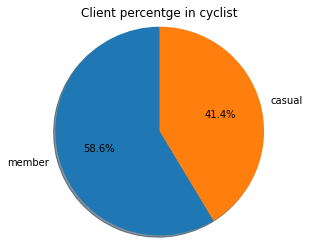

In [57]:
riders = data12['member_casual'].value_counts().to_frame(name = 'Number of riders')
riders['percentage'] = riders['Number of riders'] / riders['Number of riders'].sum() * 100
riders.index.name = 'Client Type'
riders = riders.reset_index()

plt.pie(riders['percentage'], labels = riders['Client Type'],  
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.title('Client percentge in cyclist')
plt.show()

##### Below is the total number of counts for different bikes irrespecive of member type and their percentage with respect to overall ride count

In [58]:
overall_bike = data12['rideable_type'].value_counts().to_frame(name = 'rides_taken')
overall_bike['percentage'] = overall_bike['rides_taken'] / overall_bike['rides_taken'].sum() * 100
overall_bike.index.name = 'Bike Type'
overall_bike = overall_bike.reset_index()
overall_bike

,Bike Type,rides_taken,percentage
0,docked_bike,2111706,78.186111
1,electric_bike,339824,12.582015
2,classic_bike,249341,9.231874


##### Below is the total number of rides taken by casual rides on different bike and their percentage with respect to overall casual ride count

In [61]:
bike_casual = data12[data12['member_casual'] == 'casual']['rideable_type'].value_counts().to_frame(name = 'rides_taken')
bike_casual['percentage'] = bike_casual['rides_taken'] / bike_casual['rides_taken'].sum() * 100
bike_casual.index.name = 'Bike Type'
bike_casual = bike_casual.reset_index()
bike_casual

,Bike Type,rides_taken,percentage
0,docked_bike,936284,83.782754
1,electric_bike,125762,11.253729
2,classic_bike,55468,4.963517


##### Below is the total number of rides taken by member rides on different bike and their percentage with respect to overall member ride count

In [68]:
bike_member = data12[data12['member_casual'] == 'member']['rideable_type'].value_counts().to_frame(name = 'rides_taken')
bike_member['percentage'] = bike_member['rides_taken'] / bike_member['rides_taken'].sum() * 100
bike_member.index.name = 'Bike Type'
bike_member = bike_member.reset_index()
bike_member

,Bike Type,rides_taken,percentage
0,docked_bike,1175422,74.236069
1,electric_bike,214062,13.519503
2,classic_bike,193873,12.244428


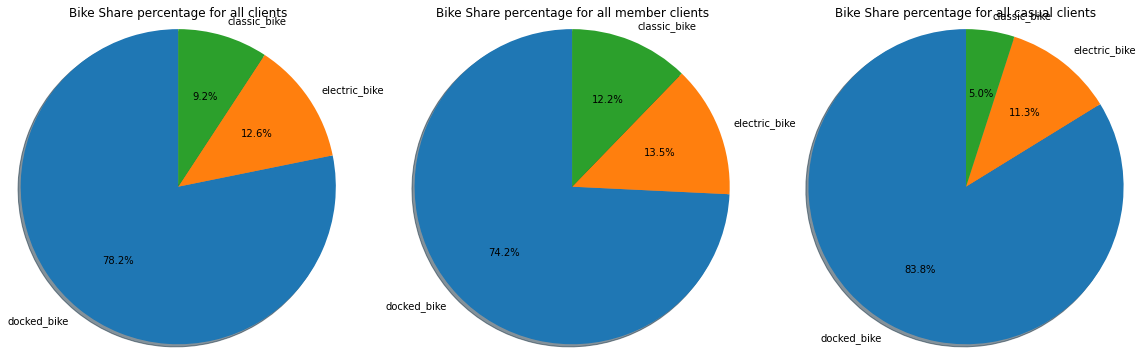

In [112]:
fig = plt.figure(figsize=(20,30))
#this line will produce a figure which has 1 row 
#and 6 columns 
ax1 = plt.subplot(1, 3, 1)
plt.pie(overall_bike['percentage'], labels = overall_bike['Bike Type'],  
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.title('Bike Share percentage for all clients')

ax1 = plt.subplot(1, 3, 2)
plt.pie(bike_member['percentage'], labels = bike_member['Bike Type'],  
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.title('Bike Share percentage for all member clients')

ax1 = plt.subplot(1, 3, 3)
plt.pie(bike_casual['percentage'], labels = bike_casual['Bike Type'],  
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.title('Bike Share percentage for all casual clients')

plt.show()


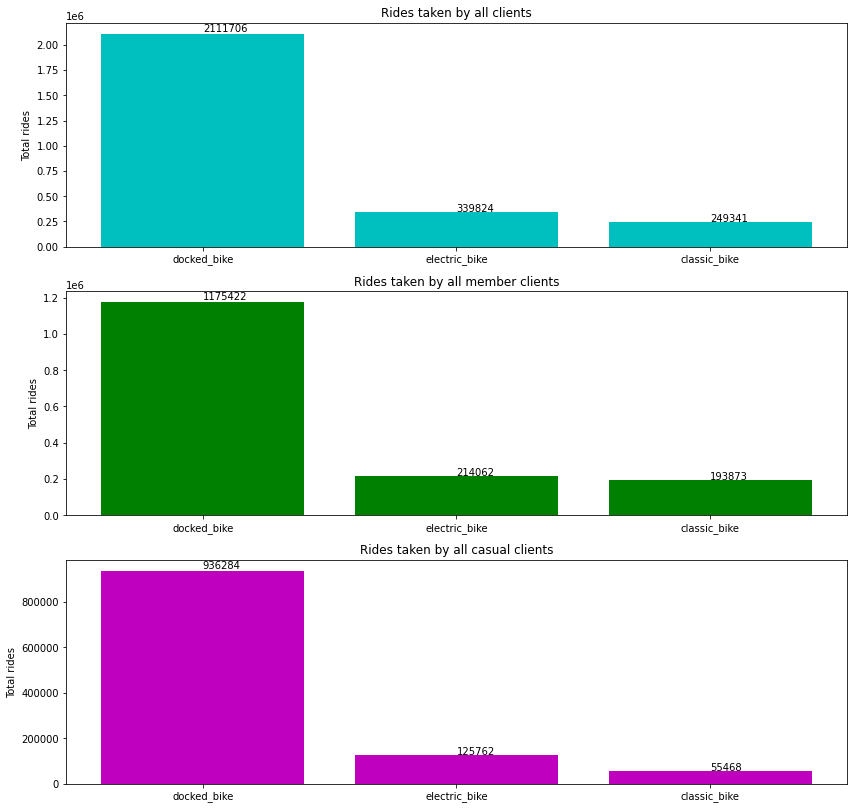

In [156]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.gca()
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
#this line will produce a figure which has 3 row 
#and 1 columns 
ax1 = plt.subplot(3, 1, 1)
plt.bar(overall_bike['Bike Type'],  overall_bike['rides_taken'],color='c', align='center')
for a,b in zip(overall_bike['Bike Type'], overall_bike['rides_taken']): 
    plt.text(a, b/0.99, b)
plt.ylabel('Total rides')
plt.xticks(overall_bike['Bike Type'], rotation='horizontal')
plt.title('Rides taken by all clients')


ax1 = plt.subplot(3, 1, 2)
plt.bar(bike_member['Bike Type'],  bike_member['rides_taken'],color='g', align='center')
for a,b in zip(bike_member['Bike Type'], bike_member['rides_taken']): 
    plt.text(a, b/0.99, round(b,2))
plt.ylabel('Total rides')
plt.xticks(bike_member['Bike Type'], rotation='horizontal')
plt.title('Rides taken by all member clients')

ax1 = plt.subplot(3, 1, 3)
plt.bar(bike_casual['Bike Type'],  bike_casual['rides_taken'],color='m', align='center')
for a,b in zip(bike_casual['Bike Type'], bike_casual['rides_taken']): 
    plt.text(a, b/0.99, round(b,2))
plt.ylabel('Total rides')
plt.xticks(bike_casual['Bike Type'], rotation='horizontal')
plt.title('Rides taken by all casual clients')


plt.show()

<p> From above value counts it is clear that most used bike among both casual and member riders is <b>Docked Bike</b>, but percentage of bike share among both casual and member riders is almost equal in all segments </p>

## Grouping rides length into three categories <br>
- 0 min to 10 min
- 11 min to 120 min
- greater than 120 min

In [143]:
data12['trip_len_catg'] = data12['trip_length_minutes'].apply(lambda x: '0_10_min' if x >= 0 and x < 11 else ('11_120_min' if (x > 10 and x < 120) else 'greater_than_120_min'))
data12.trip_len_catg.value_counts()

11_120_min              1688423
0_10_min                 956979
greater_than_120_min      55469
Name: trip_len_catg, dtype: int64

Text(0.5, 1.0, 'Ride usage percentge in cyclist (All Casual Clients)')

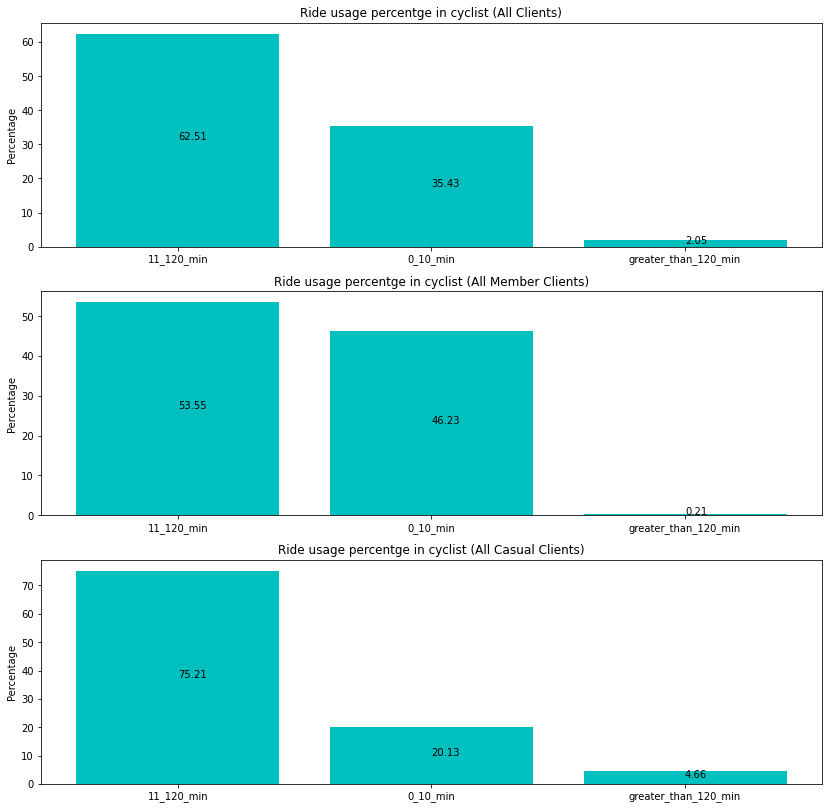

In [159]:
# Getting for all clients
trip_catg = data12['trip_len_catg'].value_counts().to_frame(name = 'Rides taken')
trip_catg['percentage'] = trip_catg['Rides taken'] / trip_catg['Rides taken'].sum() * 100
trip_catg.index.name = 'Trip Length Category'
trip_catg = trip_catg.reset_index()

# Getting for all Member clients
trip_catg_mem = data12[data12['member_casual'] == 'member']['trip_len_catg'].value_counts().to_frame(name = 'Rides taken')
trip_catg_mem['percentage'] = trip_catg_mem['Rides taken'] / trip_catg_mem['Rides taken'].sum() * 100
trip_catg_mem.index.name = 'Trip Length Category'
trip_catg_mem = trip_catg_mem.reset_index()

# Getting for all Casual clients
trip_catg_cas = data12[data12['member_casual'] == 'casual']['trip_len_catg'].value_counts().to_frame(name = 'Rides taken')
trip_catg_cas['percentage'] = trip_catg_cas['Rides taken'] / trip_catg_cas['Rides taken'].sum() * 100
trip_catg_cas.index.name = 'Trip Length Category'
trip_catg_cas = trip_catg_cas.reset_index()

# Plotting results
fig = plt.figure(figsize=(14,14))
ax1 = plt.gca()
ax1 = plt.subplot(3, 1, 1)
plt.bar(trip_catg['Trip Length Category'],  trip_catg['percentage'],color='c', align='center')
for a,b in zip(trip_catg['Trip Length Category'], trip_catg['percentage']): 
    plt.text(a, b/2, round(b,2))
plt.ylabel('Percentage')
plt.xticks(trip_catg['Trip Length Category'], rotation='horizontal')
plt.title('Ride usage percentge in cyclist (All Clients)')

ax1 = plt.subplot(3, 1, 2)
plt.bar(trip_catg_mem['Trip Length Category'],  trip_catg_mem['percentage'],color='c', align='center')
for a,b in zip(trip_catg_mem['Trip Length Category'], trip_catg_mem['percentage']): 
    plt.text(a, b/2, round(b,2))
plt.ylabel('Percentage')
plt.xticks(trip_catg_mem['Trip Length Category'], rotation='horizontal')
plt.title('Ride usage percentge in cyclist (All Member Clients)')

ax1 = plt.subplot(3, 1, 3)
plt.bar(trip_catg_cas['Trip Length Category'],  trip_catg_cas['percentage'],color='c', align='center')
for a,b in zip(trip_catg_cas['Trip Length Category'], trip_catg_cas['percentage']): 
    plt.text(a, b/2, round(b,2))
plt.ylabel('Percentage')
plt.xticks(trip_catg_cas['Trip Length Category'], rotation='horizontal')
plt.title('Ride usage percentge in cyclist (All Casual Clients)')

#### Insights

- Ride usage for member riders is very high (46%) in 0-10 min segment, which needs to be dropped and there should be increase in other segments.
- Casual riders have high usage in 11-120 min segment nearly 75%

### Trend of Average ride length by Casual and member riders over the year for <b><u>Docked Bike</u></b>

In [160]:
data_group = data12[data12['rideable_type'] == 'docked_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_casual_avg_Tl = data_group[data_group['member_casual'] == 'casual'][['month','trip_length_minutes']]
data_casual_avg_Tl

,month,trip_length_minutes
0,202005,51.806964
2,202006,52.454352
4,202007,60.663203
6,202008,47.180016
8,202009,43.901938
10,202010,38.783862
12,202011,42.873159
14,202012,62.357897
16,202101,72.622439
18,202102,147.329238


In [161]:
data_group = data12[data12['rideable_type'] == 'docked_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_member_avg_Tl = data_group[data_group['member_casual'] == 'member'][['month','trip_length_minutes']]
data_member_avg_Tl.reset_index()
data_member_avg_Tl

,month,trip_length_minutes
1,202005,20.040220
3,202006,18.775435
5,202007,18.015952
7,202008,16.990857
9,202009,15.727617
11,202010,14.867563
13,202011,14.397206
15,202012,12.303681
17,202101,2.633333


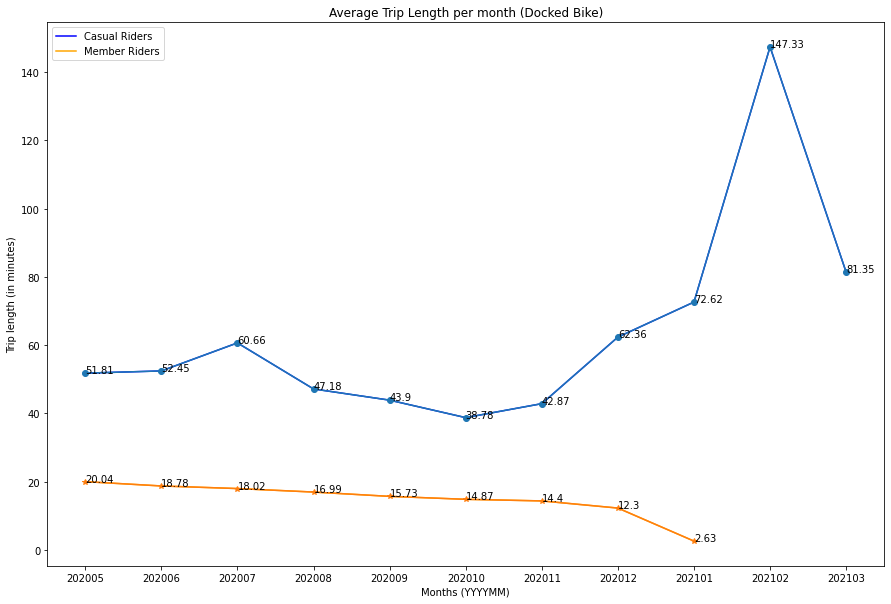

In [162]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_avg_Tl['month'],data_casual_avg_Tl['trip_length_minutes'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_avg_Tl['month'],data_member_avg_Tl['trip_length_minutes'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_avg_Tl['month'],data_casual_avg_Tl['trip_length_minutes'], marker='o')
for a,b in zip(data_casual_avg_Tl['month'], data_casual_avg_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_avg_Tl['month'],data_member_avg_Tl['trip_length_minutes'], marker='*')
for a,b in zip(data_member_avg_Tl['month'], data_member_avg_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
plt.legend()
plt.xlabel('Months (YYYYMM)')
# naming the y axis
plt.ylabel('Trip length (in minutes)')
# giving a title to my graph
plt.title('Average Trip Length per month (Docked Bike)')
plt.show()

#### Insights
<p> It seems there is an overall increase in average trip length for casual riders, whereas there is constant downfall in average trip length for member riders in case of docked bikes. </p>

### Trend of Average ride length by Casual and member riders over the year for <b><u>Electric Bike</u></b>

In [163]:
data_group_tot = data12[data12['rideable_type'] == 'electric_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_casual_tot_Tl = data_group_tot[data_group_tot['member_casual'] == 'casual'][['month','trip_length_minutes']]
data_casual_tot_Tl

,month,trip_length_minutes
0,202007,29.147684
2,202008,28.037062
4,202009,22.997524
6,202010,19.880063
8,202011,20.658093
10,202012,15.936214
12,202101,14.233231
14,202102,18.461965
16,202103,22.027149


In [164]:
data_group_tot = data12[data12['rideable_type'] == 'electric_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_member_tot_Tl = data_group_tot[data_group_tot['member_casual'] == 'member'][['month','trip_length_minutes']]
data_member_tot_Tl

,month,trip_length_minutes
1,202007,17.016729
3,202008,16.801544
5,202009,14.273000
7,202010,12.314393
9,202011,12.276760
11,202012,11.877434
13,202101,11.593366
15,202102,13.275680
17,202103,12.922901


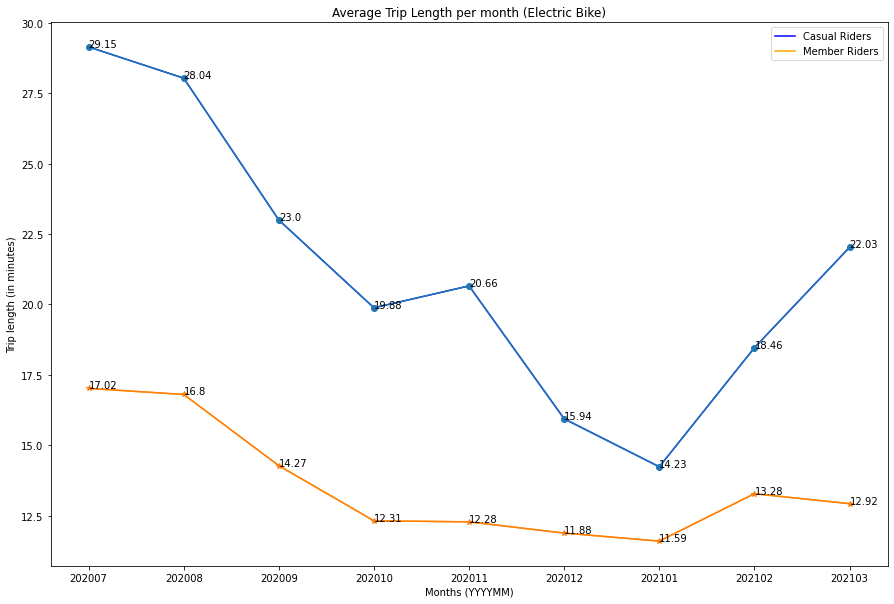

In [165]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_tot_Tl['month'],data_casual_tot_Tl['trip_length_minutes'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_tot_Tl['month'],data_member_tot_Tl['trip_length_minutes'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_tot_Tl['month'],data_casual_tot_Tl['trip_length_minutes'], marker='o')
for a,b in zip(data_casual_tot_Tl['month'], data_casual_tot_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_tot_Tl['month'],data_member_tot_Tl['trip_length_minutes'], marker='*')
for a,b in zip(data_member_tot_Tl['month'], data_member_tot_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
plt.legend()
plt.xlabel('Months (YYYYMM)')
# naming the y axis
plt.ylabel('Trip length (in minutes)')
# giving a title to my graph
plt.title('Average Trip Length per month (Electric Bike)')
plt.show()

#### Insights
<p> It seems there is decrease in average trip length for casual riders and member riders last quater, and then again increase at start of the year in case of electric bikes </p>

### Trend of Average ride length by Casual and member riders over the year for <b><u>Classic Bike</u></b>

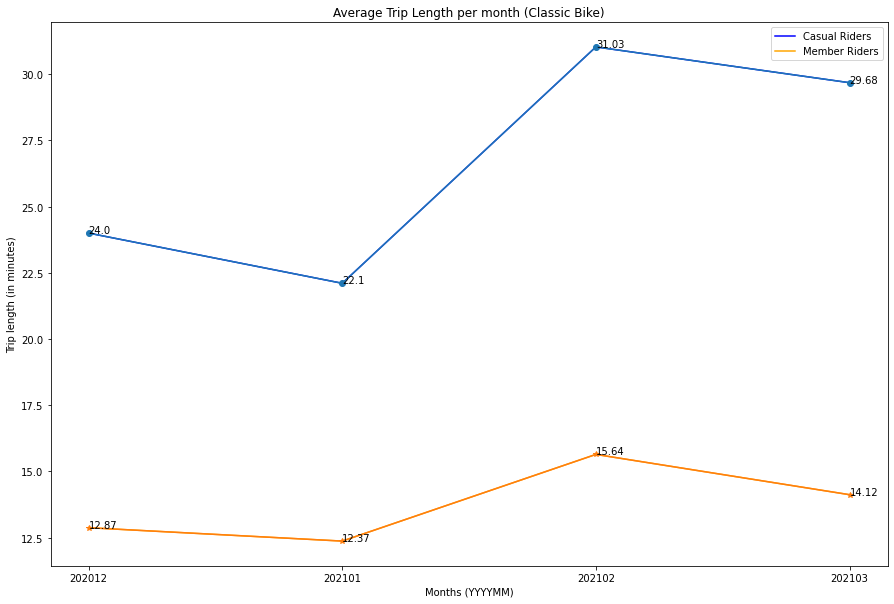

In [166]:
data_group_tot = data12[data12['rideable_type'] == 'classic_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_casual_cb_Tl = data_group_tot[data_group_tot['member_casual'] == 'casual'][['month','trip_length_minutes']]
data_casual_cb_Tl

data_group_tot = data12[data12['rideable_type'] == 'classic_bike'].groupby(['month','member_casual'],as_index=False)['trip_length_minutes'].mean()
data_member_cb_Tl = data_group_tot[data_group_tot['member_casual'] == 'member'][['month','trip_length_minutes']]
data_member_cb_Tl

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_cb_Tl['month'],data_casual_cb_Tl['trip_length_minutes'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_cb_Tl['month'],data_member_cb_Tl['trip_length_minutes'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_cb_Tl['month'],data_casual_cb_Tl['trip_length_minutes'], marker='o')
for a,b in zip(data_casual_cb_Tl['month'], data_casual_cb_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_cb_Tl['month'],data_member_cb_Tl['trip_length_minutes'], marker='*')
for a,b in zip(data_member_cb_Tl['month'], data_member_cb_Tl['trip_length_minutes']): 
    plt.text(a, b, round(b,2))
plt.legend()
plt.xlabel('Months (YYYYMM)')
# naming the y axis
plt.ylabel('Trip length (in minutes)')
# giving a title to my graph
plt.title('Average Trip Length per month (Classic Bike)')
plt.show()


#### Insights
<p> It seems that overall average trip length for casual riders and member riders remains constant through out the year in case of classic bikes.</p>

### Getting the day when most of casual and member rider would go for a ride

<p>Naming convention for days <br>
1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thrusday, 6 = Friday, 7 = Saturday</p>

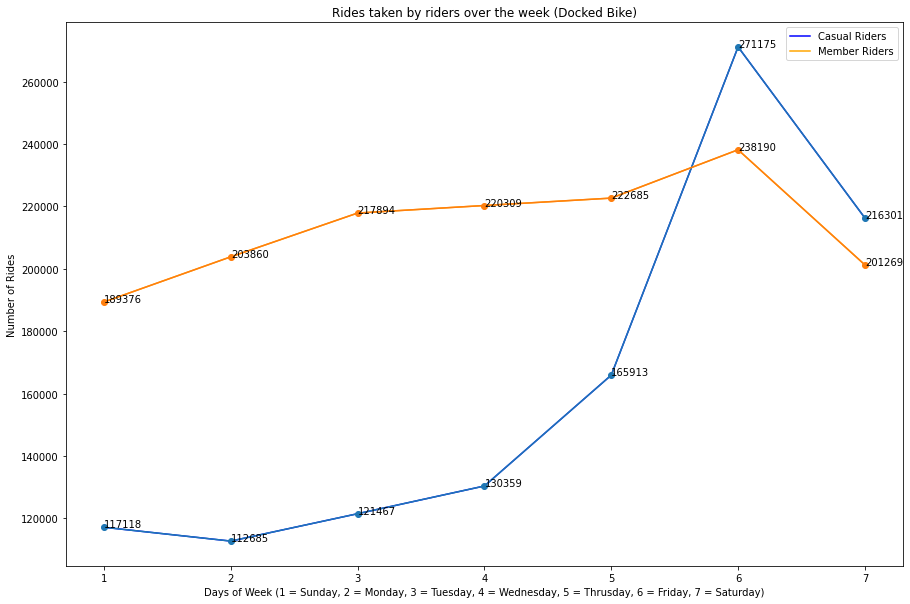

In [33]:
data_group_count = data12[data12['rideable_type'] == 'docked_bike'].groupby(['day_of_week','member_casual'],as_index=False).size()
data_group_count = data_group_count.rename(columns={"size":"Total rides taken"})
data_casual_count_wd = data_group_count[data_group_count['member_casual'] == 'casual'][['day_of_week','Total rides taken']]

data_member_count_wd = data_group_count[data_group_count['member_casual'] == 'member'][['day_of_week','Total rides taken']]



f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_casual_count_wd['day_of_week'], data_casual_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_member_count_wd['day_of_week'], data_member_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.legend()
plt.xlabel('Days of Week (1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thrusday, 6 = Friday, 7 = Saturday)')
# naming the y axis
plt.ylabel('Number of Rides')
# giving a title to my graph
plt.title('Rides taken by riders over the week (Docked Bike)')
plt.show()

<p> As per above trend it seems for <b>Docked bikes</b> most rides are taken on <b>Fridays</b> by Member riders and it is pretty much constant over the week in case of casual riders.</p>

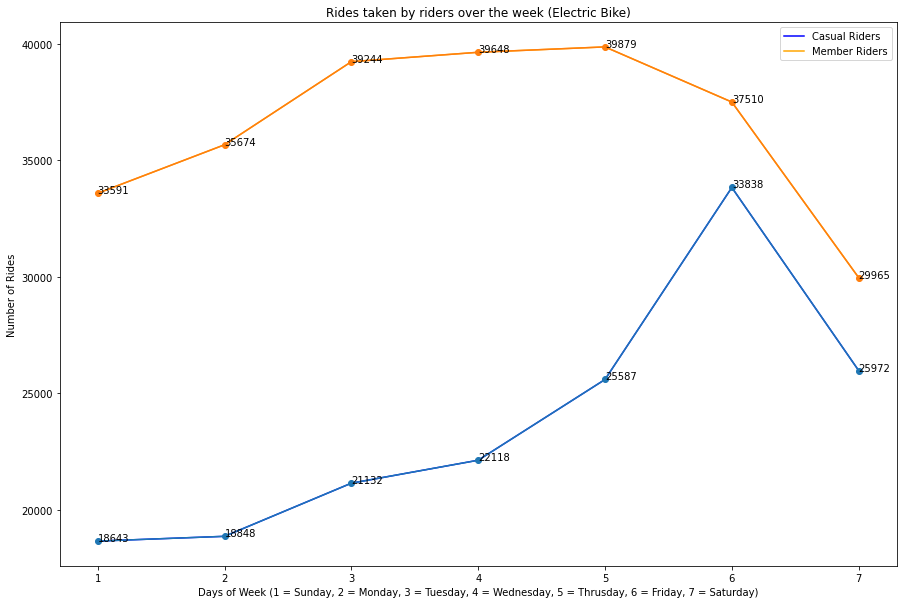

In [34]:
data_group_count = data12[data12['rideable_type'] == 'electric_bike'].groupby(['day_of_week','member_casual'],as_index=False).size()
data_group_count = data_group_count.rename(columns={"size":"Total rides taken"})
data_casual_count_wd = data_group_count[data_group_count['member_casual'] == 'casual'][['day_of_week','Total rides taken']]

data_member_count_wd = data_group_count[data_group_count['member_casual'] == 'member'][['day_of_week','Total rides taken']]



f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_casual_count_wd['day_of_week'], data_casual_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_member_count_wd['day_of_week'], data_member_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.legend()
plt.xlabel('Days of Week (1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thrusday, 6 = Friday, 7 = Saturday)')
# naming the y axis
plt.ylabel('Number of Rides')
# giving a title to my graph
plt.title('Rides taken by riders over the week (Electric Bike)')
plt.show()

<p> As per above trend it seems for <b>Electric bikes</b> most rides are taken on <b>increasing</b> until middle of week and then starts falling by Casual riders and in case of casual riders most rides were taken on <b>Fridays</b>.</p>

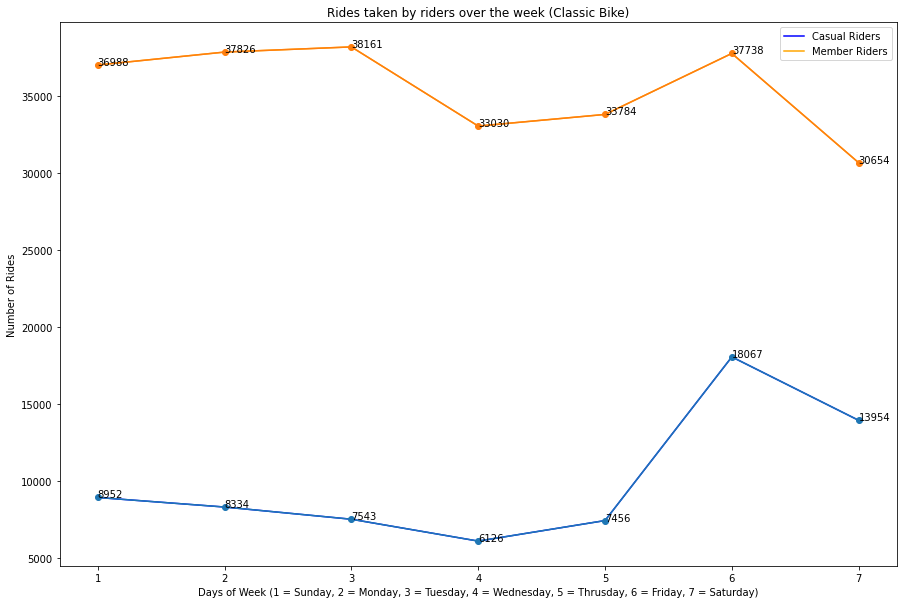

In [35]:
data_group_count = data12[data12['rideable_type'] == 'classic_bike'].groupby(['day_of_week','member_casual'],as_index=False).size()
data_group_count = data_group_count.rename(columns={"size":"Total rides taken"})
data_casual_count_wd = data_group_count[data_group_count['member_casual'] == 'casual'][['day_of_week','Total rides taken']]

data_member_count_wd = data_group_count[data_group_count['member_casual'] == 'member'][['day_of_week','Total rides taken']]



f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'],label = 'Casual Riders', color = 'blue')
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'],label = 'Member Riders', color = 'orange')

plt.plot(data_casual_count_wd['day_of_week'],data_casual_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_casual_count_wd['day_of_week'], data_casual_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.plot(data_member_count_wd['day_of_week'],data_member_count_wd['Total rides taken'], marker='o')
for a,b in zip(data_member_count_wd['day_of_week'], data_member_count_wd['Total rides taken']): 
    plt.text(a, b, round(b,2))
    
plt.legend()
plt.xlabel('Days of Week (1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thrusday, 6 = Friday, 7 = Saturday)')
# naming the y axis
plt.ylabel('Number of Rides')
# giving a title to my graph
plt.title('Rides taken by riders over the week (Classic Bike)')
plt.show()

<p> As per above trend it seems for <b>Classic bikes</b> number of rides taken are constant over the week in case of Casual and member riders .</p>